In [3]:
import os
import pandas as pd
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2

In [2]:
from src.website_fetching.edac_fetching import post_process_data, load_data, load_all_parent_directory,load_edac_from_website_dir, load_from_website

# Define the url and fields we want to fetch

In [3]:
parent_url0 = "https://archives.esac.esa.int/psa/ftp/INTERNATIONAL-ROSETTA-MISSION/ROSETTA_HK/RO-X-HK-3-EDAC-V1.0/DATA/AOCS_AND_DMS_EDAC_CNTR/"
parent_url1 = "https://archives.esac.esa.int/psa/ftp/INTERNATIONAL-ROSETTA-MISSION/ROSETTA_HK/RO-X-HK-3-EDAC-V1.0/DATA/NAVCAM_A_EDAC_CNTR/"
parent_url2 = "https://archives.esac.esa.int/psa/ftp/INTERNATIONAL-ROSETTA-MISSION/ROSETTA_HK/RO-X-HK-3-EDAC-V1.0/DATA/NAVCAM_B_EDAC_CNTR/"
parent_url3 = "https://archives.esac.esa.int/psa/ftp/INTERNATIONAL-ROSETTA-MISSION/ROSETTA_HK/RO-X-HK-3-EDAC-V1.0/DATA/STR_A_EDAC_CNTR/"
parent_url4 = "https://archives.esac.esa.int/psa/ftp/INTERNATIONAL-ROSETTA-MISSION/ROSETTA_HK/RO-X-HK-3-EDAC-V1.0/DATA/STR_B_EDAC_CNTR/"
parent_url5 = "https://archives.esac.esa.int/psa/ftp/INTERNATIONAL-ROSETTA-MISSION/ROSETTA_HK/RO-X-HK-3-EDAC-V1.0/DATA/STR_NB_SEU_FOUND/"
urls = [parent_url0, parent_url1, parent_url2, parent_url3, parent_url4, parent_url5]

# Fetch the data

In [4]:
index = 0
measures, res = await load_all_parent_directory(urls[index])

The links in the parents directory are:
['?C=N;O=D', '?C=M;O=A', '?C=S;O=A', '?C=D;O=A', '/psa/ftp/INTERNATIONAL-ROSETTA-MISSION/ROSETTA_HK/RO-X-HK-3-EDAC-V1.0/DATA/', '2004_Q1/', '2004_Q2/', '2004_Q3/', '2004_Q4/', '2005_Q1/', '2005_Q2/', '2005_Q3/', '2005_Q4/', '2006_Q1/', '2006_Q2/', '2006_Q3/', '2006_Q4/', '2007_Q1/', '2007_Q2/', '2007_Q3/', '2007_Q4/', '2008_Q1/', '2008_Q2/', '2008_Q3/', '2008_Q4/', '2009_Q1/', '2009_Q2/', '2009_Q3/', '2009_Q4/', '2010_Q1/', '2010_Q2/', '2010_Q3/', '2010_Q4/', '2011_Q1/', '2011_Q2/', '2014_Q1/', '2014_Q2/', '2014_Q3/', '2014_Q4/', '2015_Q1/', '2015_Q2/', '2015_Q3/', '2015_Q4/', '2016_Q1/', '2016_Q2/', '2016_Q3/']
The measures found for this directory are:
['NACW0D0A', 'NDMW0D0A']


100%|██████████| 41/41 [00:54<00:00,  1.34s/it]


In [5]:
# Debug res haha
res0 = [r[0] for r in res]
res1 = [r[1] for r in res]
res1

[{'NACW0D0A': 'ROS_HK_NACW0D0A_2004_Q1.TAB',
  'NDMW0D0A': 'ROS_HK_NDMW0D0A_2004_Q1.TAB'},
 {'NACW0D0A': 'ROS_HK_NACW0D0A_2004_Q2.TAB',
  'NDMW0D0A': 'ROS_HK_NDMW0D0A_2004_Q2.TAB'},
 {'NACW0D0A': 'ROS_HK_NACW0D0A_2004_Q3.TAB',
  'NDMW0D0A': 'ROS_HK_NDMW0D0A_2004_Q3.TAB'},
 {'NACW0D0A': 'ROS_HK_NACW0D0A_2004_Q4.TAB',
  'NDMW0D0A': 'ROS_HK_NDMW0D0A_2004_Q4.TAB'},
 {'NACW0D0A': 'ROS_HK_NACW0D0A_2005_Q1.TAB',
  'NDMW0D0A': 'ROS_HK_NDMW0D0A_2005_Q1.TAB'},
 {'NACW0D0A': 'ROS_HK_NACW0D0A_2005_Q2.TAB',
  'NDMW0D0A': 'ROS_HK_NDMW0D0A_2005_Q2.TAB'},
 {'NACW0D0A': 'ROS_HK_NACW0D0A_2005_Q3.TAB',
  'NDMW0D0A': 'ROS_HK_NDMW0D0A_2005_Q3.TAB'},
 {'NACW0D0A': 'ROS_HK_NACW0D0A_2005_Q4.TAB',
  'NDMW0D0A': 'ROS_HK_NDMW0D0A_2005_Q4.TAB'},
 {'NACW0D0A': 'ROS_HK_NACW0D0A_2006_Q1.TAB',
  'NDMW0D0A': 'ROS_HK_NDMW0D0A_2006_Q1.TAB'},
 {'NACW0D0A': 'ROS_HK_NACW0D0A_2006_Q2.TAB',
  'NDMW0D0A': 'ROS_HK_NDMW0D0A_2006_Q2.TAB'},
 {'NACW0D0A': 'ROS_HK_NACW0D0A_2006_Q3.TAB',
  'NDMW0D0A': 'ROS_HK_NDMW0D0A_2006_Q3.TAB'},

# Simple post fetching transformations

In [6]:
data, files = post_process_data(res, measures)
files

{'NACW0D0A': ['ROS_HK_NACW0D0A_2004_Q1.TAB',
  'ROS_HK_NACW0D0A_2004_Q2.TAB',
  'ROS_HK_NACW0D0A_2004_Q3.TAB',
  'ROS_HK_NACW0D0A_2004_Q4.TAB',
  'ROS_HK_NACW0D0A_2005_Q1.TAB',
  'ROS_HK_NACW0D0A_2005_Q2.TAB',
  'ROS_HK_NACW0D0A_2005_Q3.TAB',
  'ROS_HK_NACW0D0A_2005_Q4.TAB',
  'ROS_HK_NACW0D0A_2006_Q1.TAB',
  'ROS_HK_NACW0D0A_2006_Q2.TAB',
  'ROS_HK_NACW0D0A_2006_Q3.TAB',
  'ROS_HK_NACW0D0A_2006_Q4.TAB',
  'ROS_HK_NACW0D0A_2007_Q1.TAB',
  'ROS_HK_NACW0D0A_2007_Q2.TAB',
  'ROS_HK_NACW0D0A_2007_Q3.TAB',
  'ROS_HK_NACW0D0A_2007_Q4.TAB',
  'ROS_HK_NACW0D0A_2008_Q1.TAB',
  'ROS_HK_NACW0D0A_2008_Q2.TAB',
  'ROS_HK_NACW0D0A_2008_Q3.TAB',
  'ROS_HK_NACW0D0A_2008_Q4.TAB',
  'ROS_HK_NACW0D0A_2009_Q1.TAB',
  'ROS_HK_NACW0D0A_2009_Q2.TAB',
  'ROS_HK_NACW0D0A_2009_Q3.TAB',
  'ROS_HK_NACW0D0A_2009_Q4.TAB',
  'ROS_HK_NACW0D0A_2010_Q1.TAB',
  'ROS_HK_NACW0D0A_2010_Q2.TAB',
  'ROS_HK_NACW0D0A_2010_Q3.TAB',
  'ROS_HK_NACW0D0A_2010_Q4.TAB',
  'ROS_HK_NACW0D0A_2011_Q1.TAB',
  'ROS_HK_NACW0D0A_2011_Q2.TAB'

# Plot the data

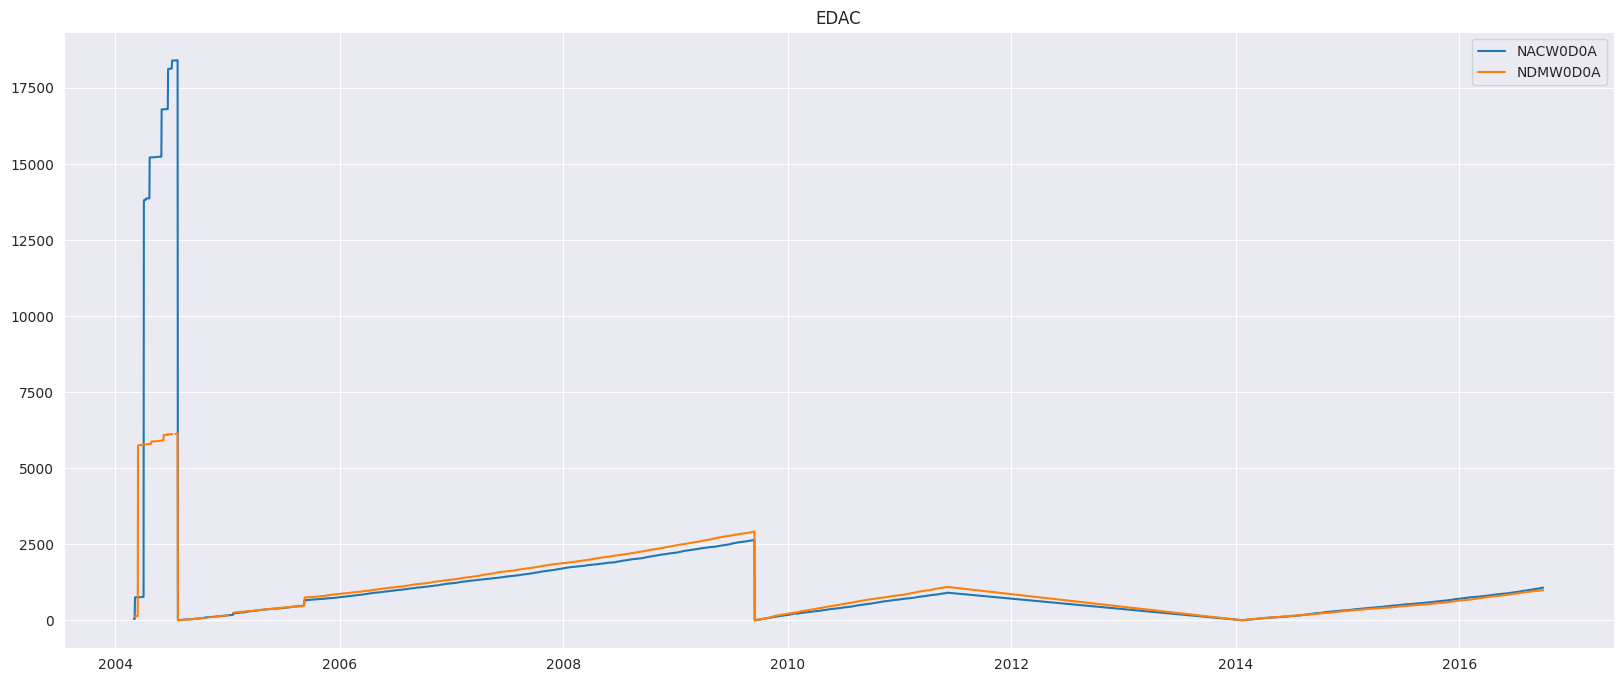

In [7]:
fig, ax = plt.subplots(figsize=(20, 8))
for name, d in data.items():
    ax.plot(d, label=name)
    plt.legend()
    plt.title("EDAC")

# Save the data into a CSV

In [8]:
directory_path = "DATA/rosetta_engineering/"
for name, d in data.items():
    file_name = f"daily-{name}.csv"
    d.to_csv(directory_path + file_name)

# Plot the EDAC data from the rosetta_engineering measures

EDAC    40
dtype: int64
EDAC    68
dtype: int64
EDAC    40
dtype: int64
EDAC    68
dtype: int64
EDAC    60
dtype: int64
EDAC    19
dtype: int64
EDAC    60
dtype: int64
EDAC    19
dtype: int64


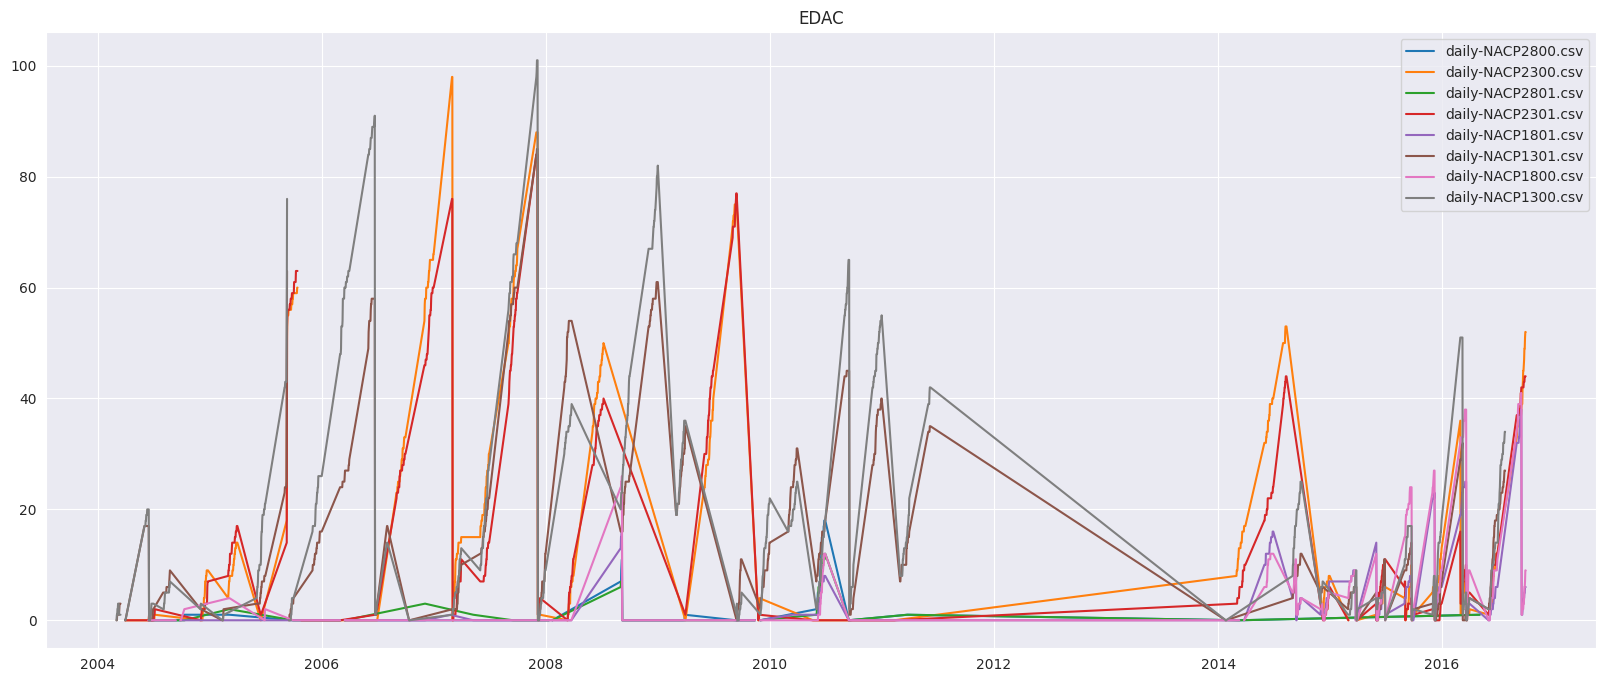

In [4]:
directory_path = "DATA/rosetta_engineering/"
files = os.listdir(directory_path)
files = list(filter(lambda x: "NACP" in x, files))

def load_engineering_param(file_path):
    data = pd.read_csv(file_path, index_col=0)
    data.index = pd.to_datetime(data.index)
    print(data.isna().sum())
    return data

file_paths = [directory_path + file for file in files]
data = [load_engineering_param(file_path) for file_path in file_paths]

# Plot the data
fig, ax = plt.subplots(figsize=(20, 8))
for i, d in enumerate(data):
    ax.plot(d, label=files[i])
    plt.legend()
    plt.title("EDAC")

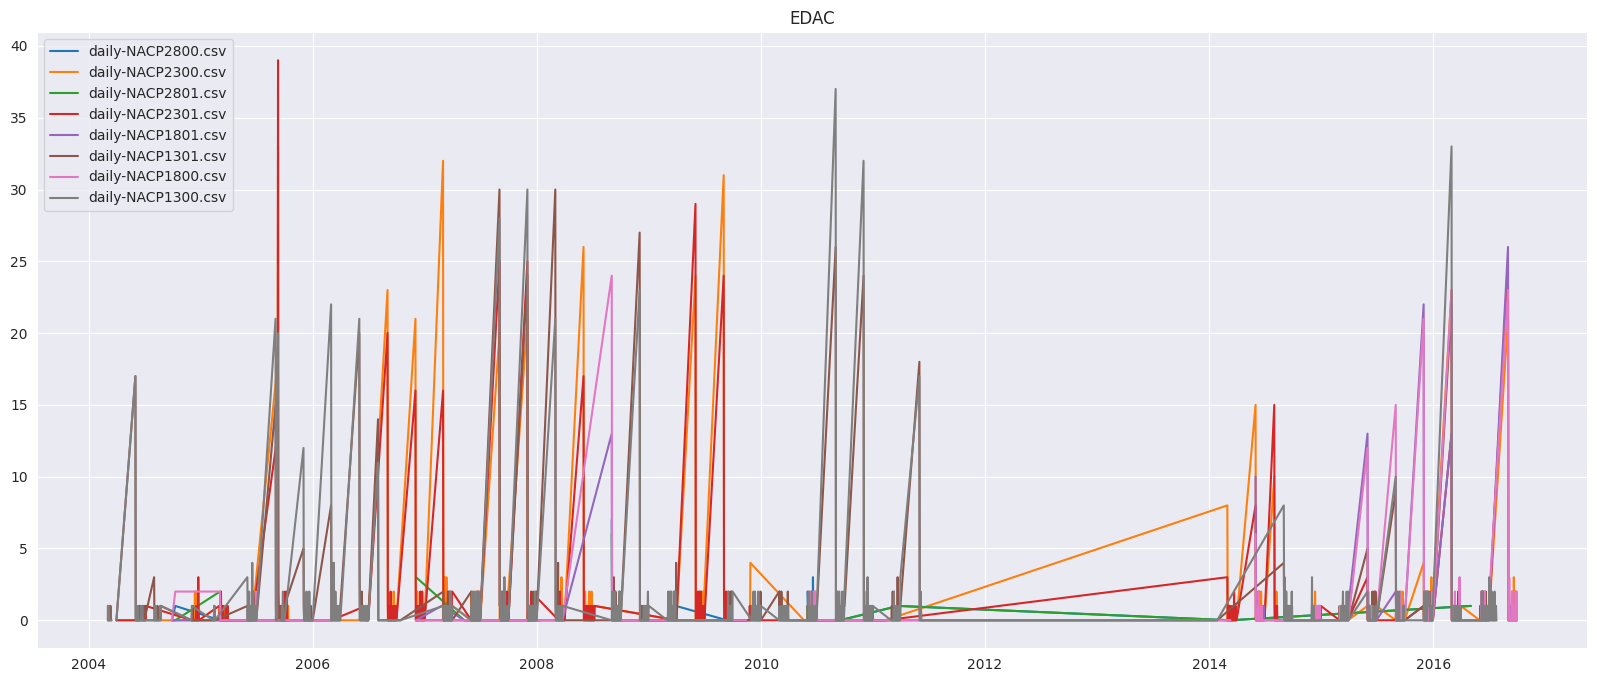

In [7]:
# Compute the derivative of the data
diff_data = [d.diff() for d in data]

# Remove negative diff values
for i, d in enumerate(diff_data):
    d[d < 0] = 0
    diff_data[i] = d

# Plot the data
fig, ax = plt.subplots(figsize=(20, 8))
for i, d in enumerate(diff_data):
    ax.plot(d, label=files[i])
    plt.legend()
    plt.title("EDAC")

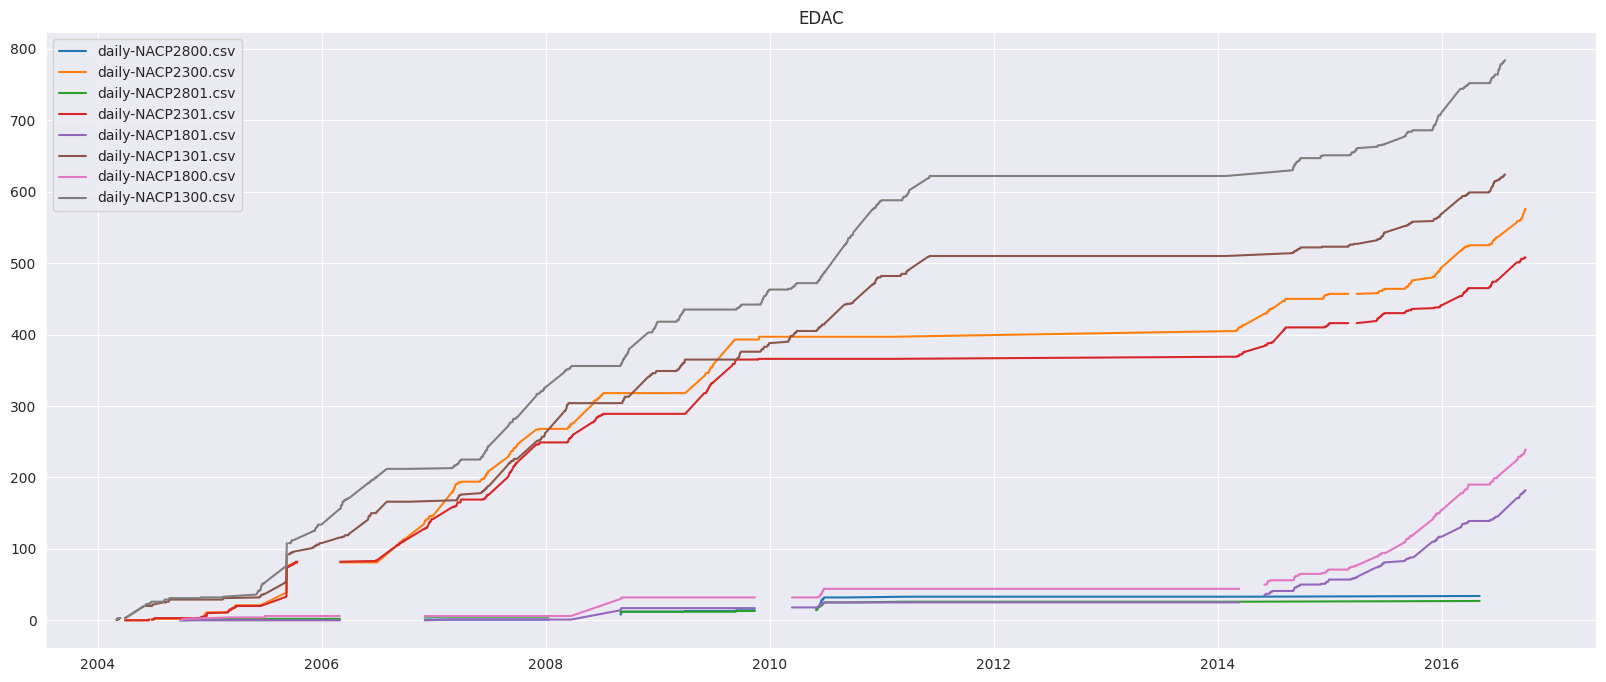

In [8]:
cumsum_data = [d.cumsum() for d in diff_data]

# Plot the data
fig, ax = plt.subplots(figsize=(20, 8))
for i, d in enumerate(cumsum_data):
    ax.plot(d, label=files[i])
    plt.legend()
    plt.title("EDAC")